In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [2]:
data=[]
labels=[]
classes=43
#cur_path=os.getcwd()
cur_path='D:\Project-Traffic Signs Recognition'

In [3]:
for i in range(classes):
    path=os.path.join(cur_path,'train',str(i))
    images=os.listdir(path)
    
    for a in images:
        try:
            image=Image.open(path+'\\'+a)
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading Data")

In [4]:
data=np.array(data)
labels=np.array(labels)
print(data.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


In [5]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 93s 94ms/step - loss: 3.6939 - accuracy: 0.3011 - val_loss: 0.6536 - val_accuracy: 0.8381
Epoch 2/15
981/981 [==============================] - 85s 86ms/step - loss: 0.9099 - accuracy: 0.7355 - val_loss: 0.2919 - val_accuracy: 0.9105
Epoch 3/15
981/981 [==============================] - 89s 91ms/step - loss: 0.6192 - accuracy: 0.8158 - val_loss: 0.2490 - val_accuracy: 0.9274
Epoch 4/15
981/981 [==============================] - 97s 99ms/step - loss: 0.4848 - accuracy: 0.8588 - val_loss: 0.2360 - val_accuracy: 0.9339
Epoch 5/15
981/981 [==============================] - 90s 91ms/step - loss: 0.3791 - accuracy: 0.8931 - val_loss: 0.1253 - val_accuracy: 0.9666
Epoch 6/15
981/981 [==============================] - 77s 79ms/step - loss: 0.3224 - accuracy: 0.9113 - val_loss: 0.0964 - val_accuracy: 0.9749
Epoch 7/15
981/981 [==============================] - 75s 77ms/step - loss: 0.2852 - accuracy: 0.9158 - val_loss: 0.0900 - val_accuracy:

In [10]:
model.save("my_model.h5")

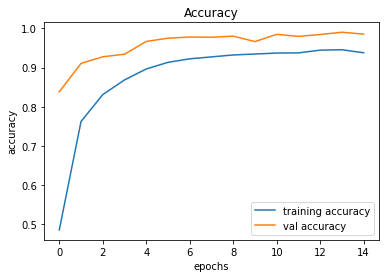

In [12]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

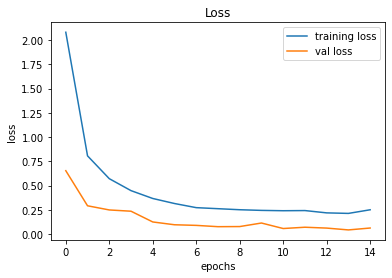

In [33]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import accuracy_score
#
#print(cur_path,path)
#print("D:\Project-Traffic Signs Recognition\Test")
path=os.path.join(cur_path,'Test.csv')
y_test = pd.read_csv(path)
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
cur_path+='/'
for img in imgs:
    image = Image.open(cur_path+img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = np.argmax(model.predict(X_test),axis=-1)
#pred = model.predict_classes(X_test)

In [36]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.956215360253365


In [37]:
model.save('traffic_classifier.h5')